# Scenario

NYC Taxi and Limousine Commission (New York City TLC), wants to build a multiple linear regression model to predict taxi fares **before the trip actually happens** using existing data that was collected over the course of a year.

**Purpose:** The purpose of this project is to demostrate knowledge of EDA and a multiple linear regression model

**Goal:** The goal is to build a multiple linear regression model and evaluate the model

**Part 1:** EDA & Checking Model Assumptions


**Part 2:** Model Building and evaluation


**Part 3:** Interpreting Model Results




## Discover the data set

Discovering the data set is very crucial:
    For the following task I have uploaded a link that directs me to     the data base administrator (NYC OpenData). In this link I will find all the relevant information about the source of the data as well as a data dictionary.
    
<iframe src="/Users/adel/Desktop/Yellow_Taxi_Trip_Data_Data_Dictionary.xlsx" width="100%" height="500px"></iframe>

[NYC OpenData](https://data.cityofnewyork.us/Transportation/2021-Yellow-Taxi-Trip-Data/m6nq-qud6/about_data)

## Imports and loading

In [1]:
# Imports
# Packages for numerics + dataframes
import pandas as pd
import numpy as np

# Packages for visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Packages for date conversions for calculating trip durations
from datetime import datetime
from datetime import date
from datetime import timedelta

# Packages for OLS, MLR, confusion matrix
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import sklearn.metrics as metrics # For confusion matrix
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error,r2_score,mean_squared_error

In [2]:
df0=pd.read_csv("/Users/adel/Desktop/TLC/2017_Yellow_Taxi_Trip_Data.csv")

## Purposes of EDA before constructing a multiple linear regression model

1.   Outliers and extreme data values can significantly impact linear regression equations. After visualizing data, make a plan for addressing outliers by dropping rows, substituting extreme data with average data, and/or removing data values greater than 3 standard deviations.

2.   EDA activities also include identifying missing data to help the analyst make decisions on their exclusion or inclusion by substituting values with data set means, medians, and other similar methods.

3.   It's important to check for things like multicollinearity between predictor variables, as well to understand their distributions, as this will help you decide what statistical inferences can be made from the model and which ones cannot.

4.  Additionally, it can be useful to engineer new features by multiplying variables together or taking the difference from one variable to another.

## Explore data with EDA

In [3]:
#Create a copy of the data frame and keep the original untouched "Preserving the original data frame"
df = df0.copy()
df.head()

,Unnamed: 0,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount
0,24870114,2,03/25/2017 8:55:43 AM,03/25/2017 9:09:47 AM,6,3.34,1,N,100,231,1,13.0,0.0,0.5,2.76,0.0,0.3,16.56
1,35634249,1,04/11/2017 2:53:28 PM,04/11/2017 3:19:58 PM,1,1.80,1,N,186,43,1,16.0,0.0,0.5,4.00,0.0,0.3,20.80
2,106203690,1,12/15/2017 7:26:56 AM,12/15/2017 7:34:08 AM,1,1.00,1,N,262,236,1,6.5,0.0,0.5,1.45,0.0,0.3,8.75
3,38942136,2,05/07/2017 1:17:59 PM,05/07/2017 1:48:14 PM,1,3.70,1,N,188,97,1,20.5,0.0,0.5,6.39,0.0,0.3,27.69
4,30841670,2,04/15/2017 11:32:20 PM,04/15/2017 11:49:03 PM,1,4.37,1,N,4,112,2,16.5,0.5,0.5,0.00,0.0,0.3,17.80


**Get the basic information of the data types**

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22699 entries, 0 to 22698
Data columns (total 18 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Unnamed: 0             22699 non-null  int64  
 1   VendorID               22699 non-null  int64  
 2   tpep_pickup_datetime   22699 non-null  object 
 3   tpep_dropoff_datetime  22699 non-null  object 
 4   passenger_count        22699 non-null  int64  
 5   trip_distance          22699 non-null  float64
 6   RatecodeID             22699 non-null  int64  
 7   store_and_fwd_flag     22699 non-null  object 
 8   PULocationID           22699 non-null  int64  
 9   DOLocationID           22699 non-null  int64  
 10  payment_type           22699 non-null  int64  
 11  fare_amount            22699 non-null  float64
 12  extra                  22699 non-null  float64
 13  mta_tax                22699 non-null  float64
 14  tip_amount             22699 non-null  float64
 15  to

Data types:

* 1- int64 (Integer): is a data type used to represent integer values in 64 bits.
* 2- object:  is a generic data type used to represent any Python object.
* 3- float64: Used to represent floating-point numbers (numbers with decimal points).

**Check for Missing Values**

In [5]:
print('Missing values per column:')
df.isna().sum()

Missing values per column:


Unnamed: 0               0
VendorID                 0
tpep_pickup_datetime     0
tpep_dropoff_datetime    0
passenger_count          0
trip_distance            0
RatecodeID               0
store_and_fwd_flag       0
PULocationID             0
DOLocationID             0
payment_type             0
fare_amount              0
extra                    0
mta_tax                  0
tip_amount               0
tolls_amount             0
improvement_surcharge    0
total_amount             0
dtype: int64

**Check for Duplicates**

In [6]:
print('Shape of dataframe:', df.shape)
print('Shape of dataframe with duplicates dropped:', df.drop_duplicates().shape)

Shape of dataframe: (22699, 18)
Shape of dataframe with duplicates dropped: (22699, 18)


There are no missing or duplicate values in the dataframe

**Note:** an extensive EDA has been performed earlier in the project TLC-EDA and Hypothesis tesing

# Modeling

## Data Pre-processing

* **1- Data Cleaning:** This involves handling missing values, outliers, and other anomalies in the dataset. Missing values can be imputed using various techniques such as mean, median, or mode imputation, or more sophisticated methods like interpolation or predictive imputation. Outliers may be detected and either removed or adjusted.

* **2- Feature Engineering:** This involves creating new features from the existing ones that may better represent the underlying patterns in the data. Feature engineering can include operations like polynomial features, interaction terms, or domain-specific transformations.

* **3- Feature Encoding:** Categorical variables are typically converted into numerical representations before being used in a model. This can involve techniques such as one-hot encoding, label encoding, or ordinal encoding, depending on the nature of the data and the requirements of the algorithm.

* **4- Feature Scaling:** Features often have different scales, which can cause issues for some machine learning algorithms. Feature scaling, such as normalization or standardization, ensures that all features have similar scales, preventing some features from dominating the others during model training.

* **5- Train-Test Split:** The dataset is typically divided into two subsets: one for training the model and the other for testing its performance. This helps in evaluating the model's generalization ability on unseen data.

In [7]:
df.describe()

,Unnamed: 0,VendorID,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount
count,2.269900e+04,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000
mean,5.675849e+07,1.556236,1.642319,2.913313,1.043394,162.412353,161.527997,1.336887,13.026629,0.333275,0.497445,1.835781,0.312542,0.299551,16.310502
std,3.274493e+07,0.496838,1.285231,3.653171,0.708391,66.633373,70.139691,0.496211,13.243791,0.463097,0.039465,2.800626,1.399212,0.015673,16.097295
min,1.212700e+04,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,-120.000000,-1.000000,-0.500000,0.000000,0.000000,-0.300000,-120.300000
25%,2.852056e+07,1.000000,1.000000,0.990000,1.000000,114.000000,112.000000,1.000000,6.500000,0.000000,0.500000,0.000000,0.000000,0.300000,8.750000
50%,5.673150e+07,2.000000,1.000000,1.610000,1.000000,162.000000,162.000000,1.000000,9.500000,0.000000,0.500000,1.350000,0.000000,0.300000,11.800000
75%,8.537452e+07,2.000000,2.000000,3.060000,1.000000,233.000000,233.000000,2.000000,14.500000,0.500000,0.500000,2.450000,0.000000,0.300000,17.800000
max,1.134863e+08,2.000000,6.000000,33.960000,99.000000,265.000000,265.000000,4.000000,999.990000,4.500000,0.500000,200.000000,19.100000,0.300000,1200.290000


There are clearly some outliers in several variables, like `tip_amount` (\$200) and `total_amount` (\$1,200). Also, a number of the variables, such as `mta_tax`, seem to be almost constant throughout the data, which would imply that they would not be expected to be very predictive.

TLC will explore various next steps for alternative pricing models for Taxis, including upfront pricing
for street hails and dynamic pricing. For upfront street hail pricing, such models could include a
system whereby the passenger’s destination is inputted upon their entry into the Taxi and **<u>a total fare
is calculated on the basis of time or distance, or through pre-set zone- or distance-based flat fares</u>**,
potentially attracting passengers who would find this option appealing. Additionally, dynamic pricing
could be further explored, particularly for e-hails, as a way to attract and **<u>pay more drivers during
times of high demand</u>** and thus ensure that passenger demand is always satisfied.

**According to [nyc.gov](https://www.nyc.gov/assets/tlc/downloads/pdf/taxi_strategic_plan_2022.pdf), Section 7: Restructuring Fares and Fees**

According to this section in nvc.gov, I realized that not only **trip distance** plays a role in fare amount, also **time spent in a taxi**. Therefore, I decided to feature engineer a new predicitve variable called <mark>**Duration**</mark>.

In addition, there are times of **high demand** according to the article. Therefore, I decided to feature a new variable and define it as <mark>**rush hours**</mark>.

### Feature Engineering

#### Convert pickup & dropoff columns to datetime

In [8]:
# Check the format of the data
df['tpep_dropoff_datetime'][6]

'05/03/2017 8:03:47 PM'

* %m: Month as a zero-padded decimal number (01, 02, …, 12)
* %d: Day of the month as a zero-padded decimal number (01, 02, …, 31)
* %Y: Year with century as a decimal number (0001, 0002, …, 2013, 2014, …, 9998, 9999)

* %I: Hour (12-hour clock) as a zero-padded decimal number (01, 02, …, 12)
* %M: Minute as a zero-padded decimal number (00, 01, …, 59)
* %S: Second as a zero-padded decimal number (00, 01, …, 59)

* %p: Locale’s equivalent of either AM or PM (AM, PM (en_US); am, pm (de_DE))

In [9]:
# Convert `tpep_pickup_datetime` to datetime format
df['tpep_pickup_datetime'] = pd.to_datetime(df['tpep_pickup_datetime'], format='%m/%d/%Y %I:%M:%S %p')

# Convert `tpep_dropoff_datetime` to datetime format
df['tpep_dropoff_datetime'] = pd.to_datetime(df['tpep_dropoff_datetime'], format='%m/%d/%Y %I:%M:%S %p')

# Display data types of `tpep_pickup_datetime`, `tpep_dropoff_datetime`
print('Data type of tpep_pickup_datetime:', df['tpep_pickup_datetime'].dtype)
print('Data type of tpep_dropoff_datetime:', df['tpep_dropoff_datetime'].dtype)

Data type of tpep_pickup_datetime: datetime64[ns]
Data type of tpep_dropoff_datetime: datetime64[ns]


#### Create a Duration Column

In [10]:
# Create `duration` column
df['duration'] = (df['tpep_dropoff_datetime'] - df['tpep_pickup_datetime'])/np.timedelta64(1,'m')

**np.timedelta64(1, 'm'):** This part of the code divides each timedelta by a timedelta representing one minute (np.timedelta64(1, 'm')). This converts the time difference from the default units (likely nanoseconds) to minutes.

#### Create a Rush hour Column

Define rush hour as:
* Any weekday (not Saturday or Sunday) AND
* Either from 06:00&ndash;10:00 or from 16:00&ndash;20:00

Create a binary `rush_hour` column that contains a 1 if the ride was during rush hour and a 0 if it was not.

For that, I have to create a **day** and **month** columns

In [11]:
# Create 'day' col
df['day'] = df['tpep_pickup_datetime'].dt.day_name().str.lower()

# Create 'month' col
df['month'] = df['tpep_pickup_datetime'].dt.strftime('%b').str.lower()

In [12]:
# Create 'rush_hour' col
df['rush_hour'] = df['tpep_pickup_datetime'].dt.hour

# If day is Saturday or Sunday, impute 0 in `rush_hour` column
df.loc[df['day'].isin(['saturday', 'sunday']), 'rush_hour'] = 0

In [13]:
def rush_hour_computation(hour):
    if 6 <= hour['rush_hour'] < 10:
        val = 1
    elif 16 <= hour['rush_hour'] < 20:
        val = 1
    else:
        val = 0
    return val

In [14]:
# Apply the `rush_hour()` function to the new column
df.loc[(df.day != 'saturday') & (df.day != 'sunday'), 'rush_hour'] = df.apply(rush_hour_computation, axis=1)
df.head()

,Unnamed: 0,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,...,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,duration,day,month,rush_hour
0,24870114,2,2017-03-25 08:55:43,2017-03-25 09:09:47,6,3.34,1,N,100,231,...,0.0,0.5,2.76,0.0,0.3,16.56,14.066667,saturday,mar,0
1,35634249,1,2017-04-11 14:53:28,2017-04-11 15:19:58,1,1.80,1,N,186,43,...,0.0,0.5,4.00,0.0,0.3,20.80,26.500000,tuesday,apr,0
2,106203690,1,2017-12-15 07:26:56,2017-12-15 07:34:08,1,1.00,1,N,262,236,...,0.0,0.5,1.45,0.0,0.3,8.75,7.200000,friday,dec,1
3,38942136,2,2017-05-07 13:17:59,2017-05-07 13:48:14,1,3.70,1,N,188,97,...,0.0,0.5,6.39,0.0,0.3,27.69,30.250000,sunday,may,0
4,30841670,2,2017-04-15 23:32:20,2017-04-15 23:49:03,1,4.37,1,N,4,112,...,0.5,0.5,0.00,0.0,0.3,17.80,16.716667,saturday,apr,0


#### Check for Outliers

Plot a box plot for each feature: `trip_distance`, `fare_amount`, `duration`.

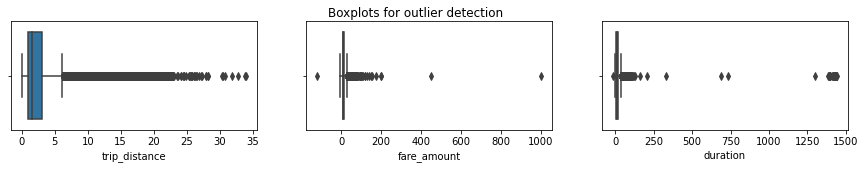

In [15]:
fig, axes = plt.subplots(1, 3, figsize=(15, 2))
fig.suptitle('Boxplots for outlier detection')
sns.boxplot(ax=axes[0], x=df['trip_distance'])
sns.boxplot(ax=axes[1], x=df['fare_amount'])
sns.boxplot(ax=axes[2], x=df['duration'])

# Save the figure before displaying it
plt.savefig("Boxplots for outlier detection1.pdf")

plt.show();



**Dealing with trip distance outliers**

In [16]:
df['trip_distance'].describe()

count    22699.000000
mean         2.913313
std          3.653171
min          0.000000
25%          0.990000
50%          1.610000
75%          3.060000
max         33.960000
Name: trip_distance, dtype: float64

* 1- Rgarding **max trip distance**, 33.96 miles is a reasonable maximum milage because according to [walksofnewyork.com](https://www.walksofnewyork.com/blog/nyc-by-the-numbers) 

"The total area of the five boroughs is 305 square miles. With Manhattan covering only 23 square miles, and Staten Island and Long Island each covering around 60 square miles, the the longest distance between its boundaries, from the northeast to the southwest, is about 35 miles."

This information suggests that a trip distance of 33.96 miles falls within the geographic limits of New York City, making it a reasonable maximum mileage.


* 2- Regarding **min trip distance** it might be possible for trips to have distances of zero if a passenger summoned a taxi and then changed their mind.


**Dealing with fare amount outliers**

In [17]:
df['fare_amount'].describe()

count    22699.000000
mean        13.026629
std         13.243791
min       -120.000000
25%          6.500000
50%          9.500000
75%         14.500000
max        999.990000
Name: fare_amount, dtype: float64

* **Low values:** Negative values are problematic.
* **High values:** The maximum fare amount in this dataset is nearly \\$1,000, which seems very unlikely.

In [18]:
IQR_fare_amount = df["fare_amount"].quantile(0.75) - df["fare_amount"].quantile(0.25)
print("The IQR of fare amount is:" , IQR_fare_amount)

The IQR of fare amount is: 8.0


In [19]:
# Impute values less than $0 with 0
df.loc[df['fare_amount'] < 0, 'fare_amount'] = 0
df['fare_amount'].min()

0.0

Now impute the maximum value as `Q3 + (6 * IQR)`

In [20]:
def outlier_imputer(column_list, iqr_factor):
    '''
    Impute upper-limit values in specified columns based on their interquartile range.

    Arguments:
        column_list: A list of columns to iterate over
        iqr_factor: A number representing x in the formula:
                    Q3 + (x * IQR). Used to determine maximum threshold,
                    beyond which a point is considered an outlier.

    The IQR is computed for each column in column_list and values exceeding
    the upper threshold for each column are imputed with the upper threshold value.
    '''
    for col in column_list:
        # Reassign minimum to zero
        df.loc[df[col] < 0, col] = 0

        # Calculate upper threshold
        q1 = df[col].quantile(0.25)
        q3 = df[col].quantile(0.75)
        iqr = q3 - q1
        upper_threshold = q3 + (iqr_factor * iqr)
        print(col)
        print('q3:', q3)
        print('upper_threshold:', upper_threshold)

        # Reassign values > threshold to threshold
        df.loc[df[col] > upper_threshold, col] = upper_threshold
        print(df[col].describe())
        print()

In [21]:
outlier_imputer(['fare_amount'], 6)

fare_amount
q3: 14.5
upper_threshold: 62.5
count    22699.000000
mean        12.897913
std         10.541137
min          0.000000
25%          6.500000
50%          9.500000
75%         14.500000
max         62.500000
Name: fare_amount, dtype: float64



**Dealing with duration outliers**

In [22]:
df['duration'].describe()

count    22699.000000
mean        17.013777
std         61.996482
min        -16.983333
25%          6.650000
50%         11.183333
75%         18.383333
max       1439.550000
Name: duration, dtype: float64

* **Low values:** There should be no values that represent negative time. Impute all negative durations with `0`.

* **High values:** Impute high values the same way I imputed the high-end outliers for fares: `Q3 + (6 * IQR)`.

In [23]:
# Impute a 0 for any negative values
df.loc[df['duration'] < 0, 'duration'] = 0
df['duration'].min()

0.0

In [24]:
# Impute the high outliers
outlier_imputer(['duration'], 6)

duration
q3: 18.383333333333333
upper_threshold: 88.78333333333333
count    22699.000000
mean        14.460555
std         11.947043
min          0.000000
25%          6.650000
50%         11.183333
75%         18.383333
max         88.783333
Name: duration, dtype: float64



### Feature Engineering / Transformations

Snap back to the scenario and the goal of the project: NYC Taxi and Limousine Commission (New York City TLC), wants to build a multiple linear regression model to predict taxi fares <u>**before the trip actually happens**</u> using existing data that was collected over the course of a year.

The challenging part is the Key word: **before the trip happens**

Therefore, I cannot train a model that uses this feature. However, I can use the statistics of trips I *do* know to generalize about ones I do not know.

####  Create mean_distance column

* 1- create a column called **mean_distance** that captures the mean distance for each group of trips that share pickup and dropoff points.

* 2- Then, a new column **mean_distance** will be added where the value at each row is the average for all trips with those pickup and dropoff locations.

In [25]:
# Create `pickup_dropoff` column
df['pickup_dropoff'] = df['PULocationID'].astype(str) + ' ' + df['DOLocationID'].astype(str)
df['pickup_dropoff'].head(2)

0    100 231
1     186 43
Name: pickup_dropoff, dtype: object

In [26]:
df.head()

,Unnamed: 0,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,...,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,duration,day,month,rush_hour,pickup_dropoff
0,24870114,2,2017-03-25 08:55:43,2017-03-25 09:09:47,6,3.34,1,N,100,231,...,0.5,2.76,0.0,0.3,16.56,14.066667,saturday,mar,0,100 231
1,35634249,1,2017-04-11 14:53:28,2017-04-11 15:19:58,1,1.80,1,N,186,43,...,0.5,4.00,0.0,0.3,20.80,26.500000,tuesday,apr,0,186 43
2,106203690,1,2017-12-15 07:26:56,2017-12-15 07:34:08,1,1.00,1,N,262,236,...,0.5,1.45,0.0,0.3,8.75,7.200000,friday,dec,1,262 236
3,38942136,2,2017-05-07 13:17:59,2017-05-07 13:48:14,1,3.70,1,N,188,97,...,0.5,6.39,0.0,0.3,27.69,30.250000,sunday,may,0,188 97
4,30841670,2,2017-04-15 23:32:20,2017-04-15 23:49:03,1,4.37,1,N,4,112,...,0.5,0.00,0.0,0.3,17.80,16.716667,saturday,apr,0,4 112


Now, I use a `groupby()` statement to group each row by the new `pickup_dropoff` column, compute the mean, and capture the values only in the `trip_distance` column. Assign the results to a variable named `grouped`.

In [27]:
grouped = df.groupby('pickup_dropoff').mean(numeric_only=True)[['trip_distance']]
grouped[:5]

,trip_distance
pickup_dropoff,
1 1,2.433333
10 148,15.700000
100 1,16.890000
100 100,0.253333
100 107,1.180000


In [28]:
# 1. Convert `grouped` to a dictionary
grouped_dict = grouped.to_dict()

# 2. Reassign to only contain the inner dictionary
grouped_dict = grouped_dict['trip_distance']

In [29]:
# 1. Create a mean_distance column that is a copy of the pickup_dropoff  column
df['mean_distance'] = df['pickup_dropoff']

# 2. Map `grouped_dict` to the `mean_distance` column
df['mean_distance'] = df['mean_distance'].map(grouped_dict)

# Confirm that it worked
df[(df['PULocationID']==4) & (df['DOLocationID']==112)][['mean_distance']]

,mean_distance
4,4.435
10649,4.435


####  Create mean_duration column

Repeat the same process

In [30]:
grouped = df.groupby('pickup_dropoff').mean(numeric_only=True)[['duration']]
grouped

# Create a dictionary where keys are unique pickup_dropoffs and values are
# mean trip duration for all trips with those pickup_dropoff combos
grouped_dict = grouped.to_dict()
grouped_dict = grouped_dict['duration']

df['mean_duration'] = df['pickup_dropoff']
df['mean_duration'] = df['mean_duration'].map(grouped_dict)

# Confirm that it worked
df[(df['PULocationID']==4) & (df['DOLocationID']==112)][['mean_duration']]

,mean_duration
4,14.616667
10649,14.616667


### Extract Relevant Feautres

 I decided to train the linear regression model on the following features:
 
 * 1- mean_distance
 * 2- mean_duration
 * 3- rush_hour
 * 4- fare amount (dependant variable)

In [31]:
df1 = df.copy()

In [32]:
df1 = df1[["fare_amount","mean_distance","mean_duration","rush_hour"]]

**Visualize the relationship between the variables**

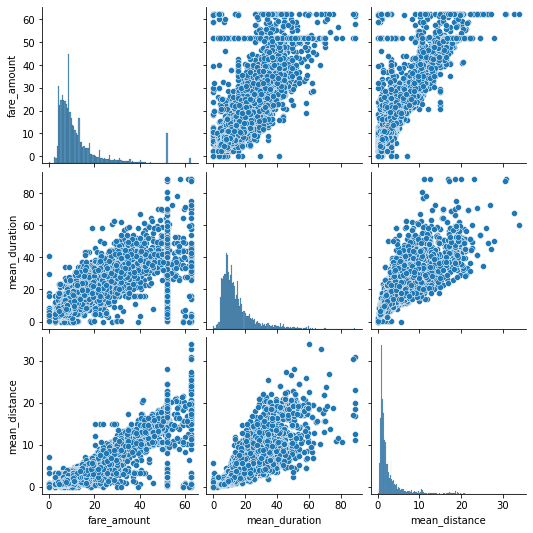

In [33]:

# Create the pair plot
sns.pairplot(df1[['fare_amount', 'mean_duration', 'mean_distance']])

# Display the figure
plt.show()

They all show a linear relationship with Fare amount; However, the features (mean distance and mean duration) show a linear relationship with each other

<u>**Note:</u> highly correlated predictor variables can be bad for linear regression models when I want to be able to draw statistical inferences about the data from the model. However, correlated predictor variables can still be used to create an accurate predictor if the prediction itself is more important than using the model as a tool to learn about your data.**

### Split data into outcome variable and features

In [34]:
# Remove the target column from the features
X = df1.drop(columns=['fare_amount'])

# Set y variable
y = df1[['fare_amount']]

# Display first few rows
X.head()

,mean_distance,mean_duration,rush_hour
0,3.521667,22.847222,0
1,3.108889,24.470370,0
2,0.881429,7.250000,1
3,3.700000,30.250000,0
4,4.435000,14.616667,0


### Split data into training and test sets

In [35]:
# Create training and testing sets

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

### Standardize the data

<u>**StandardScaler():**</u>

* 1- Compute the mean and standard deviation: For each feature (column) in the dataset, StandardScaler() computes the mean and standard deviation.

* 2- Subtract the mean: It subtracts the mean from each feature value. This centers the data around zero.

* 3- Scale to unit variance: It then scales each feature by dividing it by its standard deviation. This ensures that the variance of each feature is one.

It ensures that each feature in the dataset has a mean of zero and a standard deviation of one.

In [36]:
# Standardize the X variables
scaler = StandardScaler().fit(X_train)
X_train_scaled = scaler.transform(X_train)
print('X_train scaled:', X_train_scaled)

X_train scaled: [[ 0.8694684   0.17616665 -0.64893329]
 [-0.60011281 -0.69829589  1.54099045]
 [-0.47829156 -0.57301906 -0.64893329]
 ...
 [-0.45121122 -0.6788917  -0.64893329]
 [-0.58944763 -0.85743597  1.54099045]
 [ 0.83673851  1.13212101 -0.64893329]]


### Fit the model

In [37]:
# Fit your model to the training data
lr=LinearRegression()
lr.fit(X_train_scaled, y_train)

LinearRegression()

## Evaluate model

### Train data

In [38]:
# Evaluate the model performance on the training data
r_sq = lr.score(X_train_scaled, y_train)
print('Coefficient of determination:', r_sq)

y_pred_train = lr.predict(X_train_scaled)



r2 = r_sq
MAE =  mean_absolute_error(y_train, y_pred_train)
MSE = mean_squared_error(y_train, y_pred_train)
RMSE = np.sqrt(mean_squared_error(y_train, y_pred_train))

#Create a metric dictionary
metric_dict = {"R2":r2,
               "MAE":MAE,
               "MSE": MSE,
               "RMSE": RMSE}

Train_results = pd.DataFrame(metric_dict,index = [0])
Train_results["Results"] = "Train Data"
Train_results

Coefficient of determination: 0.8398164931960592


,R2,MAE,MSE,RMSE,Results
0,0.839816,2.187287,17.892745,4.229982,Train Data


### Test data

In [39]:
# Scale the X_test data
X_test_scaled = scaler.transform(X_test)

In [40]:
# Evaluate the model performance on the test data
r_sq = lr.score(X_test_scaled, y_test)
print('Coefficient of determination:', r_sq)

y_pred_test = lr.predict(X_test_scaled)



r2 = r_sq
MAE =  mean_absolute_error(y_test, y_pred_test)
MSE = mean_squared_error(y_test, y_pred_test)
RMSE = np.sqrt(mean_squared_error(y_test, y_pred_test))

#Create a metric dictionary
metric_dict = {"R2":r2,
               "MAE":MAE,
               "MSE": MSE,
               "RMSE": RMSE}

Test_results = pd.DataFrame(metric_dict,index = [0])
Test_results["Results"] = "Test Data"
Test_results

Coefficient of determination: 0.8683133417774546


,R2,MAE,MSE,RMSE,Results
0,0.868313,2.133002,14.320476,3.78424,Test Data


## Prediction Results

In [41]:
# Create a `results` dataframe
results = pd.DataFrame(data={'actual': y_test['fare_amount'],
                             'predicted': y_pred_test.ravel()}) #converting it into a 1-dimensional array.
results['residual'] = results['actual'] - results['predicted']
results.head()

,actual,predicted,residual
5818,14.0,12.420656,1.579344
18134,28.0,16.379427,11.620573
4655,5.5,6.766782,-1.266782
7378,15.5,16.291295,-0.791295
13914,9.5,10.467252,-0.967252


In [45]:
results.to_csv('Prediction Results.csv', index=False)  # Save as CSV without index

## Visualize model results

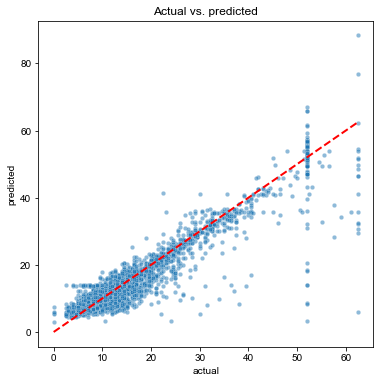

In [42]:
# Create a scatterplot to visualize `predicted` over `actual`
fig, ax = plt.subplots(figsize=(6, 6))
sns.set(style='whitegrid')
sns.scatterplot(x='actual',
                y='predicted',
                data=results,
                s=20,
                alpha=0.5,
                ax=ax
)
# Draw an x=y line to show what the results would be if the model were perfect

plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--',linewidth=2)

plt.savefig("Actual vs. predicted.pdf")
plt.title('Actual vs. predicted');

## Check model Assumptions

* 1- Linearity (Checked before and it was met) - Linearity between X and y variables
* 2- Normality - Residuals has to be normally distributed
* 3- Homoscedasticity - the model's residuals have to be evenly distributed above and below zero

**Normality**

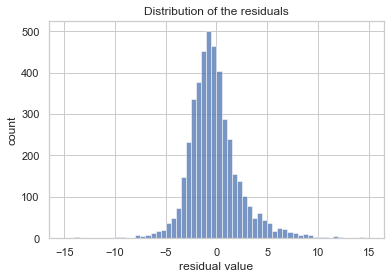

In [43]:
# Visualize the distribution of the `residuals`
sns.histplot(results['residual'], bins=np.arange(-15,15.5,0.5))
plt.title('Distribution of the residuals')
plt.xlabel('residual value')
plt.ylabel('count')

plt.savefig('Distribution of the residuals.pdf')

A normal distribution around zero is good, as it demonstrates that the model's errors are evenly distributed and unbiased.

**Homoscedasticity**

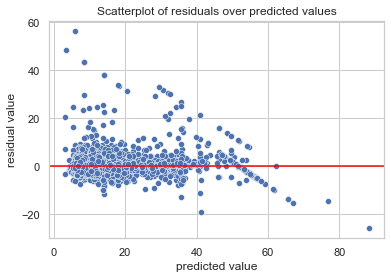

In [44]:
# Create a scatterplot of `residuals` over `predicted`

sns.scatterplot(x='predicted', y='residual', data=results)
plt.axhline(0, c='red')
plt.title('Scatterplot of residuals over predicted values')
plt.xlabel('predicted value')
plt.ylabel('residual value')

plt.savefig('Homoscedasticity Assumption.pdf')
plt.show()

The model's residuals are evenly distributed above and below zero

## Conclusion

The model performance is high on both training and test sets, suggesting that there is little bias in the model and that the model is not overfit. In fact, the test scores were even better than the training scores.

For the test data, an R<sup>2</sup> of 0.868 means that 86.8% of the variance in the `fare_amount` variable is described by the model.



# Good references for metrics

(https://www.analyticsvidhya.com/blog/2021/05/know-the-best-evaluation-metrics-for-your-regression-model/)